In [5]:
from sklearn import datasets
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
powers = [1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4]
zoomed = np.array(range(1,101))

In [40]:
daibetes=datasets.load_diabetes()

In [41]:
daibetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [42]:
print(daibetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [43]:
daibetes['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [44]:
daibetes['data'].shape

(442, 10)

In [45]:
daibetes['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [46]:
daibetes['target'].shape

(442,)

In [47]:
daibetes['target_filename']

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\diabetes_target.csv.gz'

In [48]:
daibetes['data_filename']

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\diabetes_data.csv.gz'

In [49]:
daibetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
model=KNeighborsRegressor()

In [51]:
X=pd.DataFrame(daibetes['data'],columns=daibetes['feature_names'])
X.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
age    442 non-null float64
sex    442 non-null float64
bmi    442 non-null float64
bp     442 non-null float64
s1     442 non-null float64
s2     442 non-null float64
s3     442 non-null float64
s4     442 non-null float64
s5     442 non-null float64
s6     442 non-null float64
dtypes: float64(10)
memory usage: 34.6 KB


In [53]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [54]:
model.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [55]:
model.predict(X)

array([181.4,  80.8, 150.8, 203.4, 119.4, 108. ,  83.6, 120.6, 127.8,
       187.8, 121.4, 129.6,  98.8, 166.8, 106.6, 144. , 174.4, 177.8,
       132.8, 142. ,  80. ,  73.4, 113.4, 273.8, 151.4, 126.4, 132. ,
       137.8, 107.2, 192.2, 154.6,  65. , 287.8,  78.6,  78.6, 109.6,
       175.2, 172.6, 235. ,  76.4, 158.6, 113.4,  97.6,  74. , 257. ,
        92.8, 163. , 150.2, 110.8, 145.4, 121.2, 152.4, 130.6,  94. ,
       157.2,  88.8, 137.2, 101. , 132.2, 156.6, 115. , 124. ,  65.8,
       132.4, 128.4, 154.4, 119.6,  88.8,  96.2, 136.6,  81.6, 234.6,
       174.4, 109.8, 133.2,  72. , 171.8, 106.6, 179.4, 121.6, 134.4,
       107.8,  69.2, 141.2,  80. , 108.6,  92.8, 124.6,  68.6, 110.6,
        95. , 136.4, 153.4,  82.8,  83.8, 126.8, 170.6, 165.8,  88.6,
       126.2, 158.8,  86.2, 151.8, 155.4, 139.4,  87. , 115. , 143.2,
       181. , 183. ,  71.2,  99.4, 134.8, 202. , 277.4, 165.4, 255.4,
       207. , 126.6, 132.2, 130. , 202. , 232.4, 158.2, 136.4, 166.4,
       111.6,  92.8,

In [56]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [57]:
model.score(X,y)

0.604957605699507

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [59]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [60]:
knn.score(X_test,y_test)

0.4031244536507893

In [61]:
knn.score(X_train,y_train)

0.5726983872342755

In [94]:
model=LinearRegression()

In [95]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [96]:
model.predict(X)

array([206.11706979,  68.07234761, 176.88406035, 166.91796559,
       128.45984241, 106.34908972,  73.89417947, 118.85378669,
       158.81033076, 213.58408893,  97.07853583,  95.1016223 ,
       115.06673301, 164.67605023, 103.07517946, 177.17236996,
       211.75953205, 182.84424343, 147.99987605, 124.01702527,
       120.33094632,  85.80377894, 113.11286302, 252.44934852,
       165.48821056, 147.72187623,  97.12824075, 179.09342974,
       129.05497324, 184.78138552, 158.71515746,  69.47588393,
       261.50255826, 112.81897436,  78.37194762,  87.66624129,
       207.92460213, 157.87686037, 240.84370686, 136.93372685,
       153.48187659,  74.15703284, 145.63105805,  77.8280105 ,
       221.0786645 , 125.22224022, 142.60147066, 109.4926324 ,
        73.14037106, 189.87368742, 157.93636782, 169.55816531,
       134.18186217, 157.72356219, 139.1077439 ,  72.73252701,
       207.8289973 ,  80.10834588, 104.08562488, 134.57807971,
       114.23779529, 180.67760064,  61.12644508,  98.72

In [97]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [99]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
model.score(X_test,y_test)

0.4152819123449395

In [101]:
model.intercept_

152.13210145902923

In [102]:
model.coef_

array([ -28.04059748, -213.18985405,  593.36917663,  269.52566526,
       -702.56925087,  335.37174473,  133.62916188,  162.59210228,
        810.25760457,  102.81513813])

In [103]:
X = pd.DataFrame(daibetes.data,columns=daibetes.feature_names)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
age    442 non-null float64
sex    442 non-null float64
bmi    442 non-null float64
bp     442 non-null float64
s1     442 non-null float64
s2     442 non-null float64
s3     442 non-null float64
s4     442 non-null float64
s5     442 non-null float64
s6     442 non-null float64
dtypes: float64(10)
memory usage: 34.6 KB


In [105]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [106]:
X_shuffle,y_shuffle = shuffle(X,y,random_state=42)

cross_val_score(LinearRegression(),X_shuffle,y_shuffle,cv=5,n_jobs=-1)

np.mean(cross_val_score(LinearRegression(),X,y,cv=5,n_jobs=-1))

0.4823181221114939

In [107]:
scalar = StandardScaler()
scalar.fit(X_shuffle)
X_scaled = scalar.transform(X_shuffle)

In [108]:
scores = cross_val_score(LinearRegression(),X_scaled,y_shuffle,cv=5,n_jobs=-1)
print(scores)
print(np.mean(scores))

[0.4526066  0.57320022 0.39145516 0.58428292 0.39081453]
0.4784718870693778


In [109]:
X_scaled = pd.DataFrame(X_scaled,columns=daibetes.feature_names)
X_scaled.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.953240,-0.938537,-0.130473,-0.336364,2.628368,2.632139,0.403384,0.721302,0.681870,-0.109740
1,1.946046,-0.938537,0.775915,0.459840,-0.524757,-0.350218,0.016374,-0.830301,-0.473291,-0.458071
2,1.335088,1.065488,-0.085153,-0.263982,2.165524,1.025748,1.177404,-0.054499,1.776412,-0.370989
3,2.022416,-0.938537,1.093151,1.666210,1.153052,0.768989,-1.609069,2.971127,2.073921,1.283585
4,0.265912,1.065488,-0.425049,-0.046836,0.805919,1.117918,-0.138431,0.721302,-0.108174,-0.196823


In [93]:
X_scaled.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.963944e-17,-7.083323e-17,0.000000,-5.978124e-17,-1.180554e-17,-2.235517e-17,2.310871e-17,1.665335e-16,-1.425456e-17,-7.326656e-17
std,1.001133e+00,1.001133e+00,1.001133,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-2.254290e+00,-9.385367e-01,-1.897929,-2.363066e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651046e+00,-2.896390e+00
25%,-7.841722e-01,-9.385367e-01,-0.719625,-7.706577e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-6.990157e-01,-6.975491e-01
50%,1.131724e-01,-9.385367e-01,-0.153132,-1.192178e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-4.094666e-02,-2.265729e-02
75%,8.005001e-01,1.065488e+00,0.656952,7.493688e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,6.818695e-01,5.869224e-01
max,2.327895e+00,1.065488e+00,3.585718,2.776071e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808758e+00,2.851075e+00


In [169]:
X= daibetes.data

In [170]:
y=daibetes.target

In [171]:
X_sex= X[:,[5]]

In [172]:
model.fit(X_sex,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

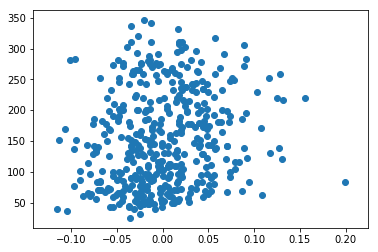

In [173]:
plt.scatter(X_sex,y)
plt.show()

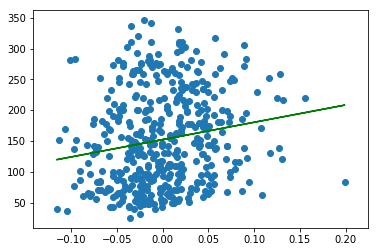

In [174]:
plt.scatter(X_sex.flatten(),y)
plt.plot(X_sex.flatten(), model.predict(X_sex),'g')
plt.show()

In [175]:
model.intercept_

152.1334841628959

In [176]:
model.coef_

array([281.78459335])

In [177]:
mean_squared_error(y,model.predict(X_sex))

5750.241102677782

In [86]:
model = LinearRegression()

In [87]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [88]:
y_pred = model.predict(X)

In [89]:
mean_squared_error(y,y_pred)

2859.6903987680657

In [90]:
model.intercept_

model.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

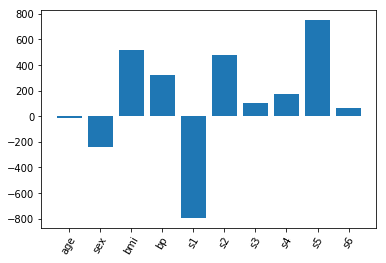

In [91]:
plt.bar(daibetes.feature_names,model.coef_)
plt.xticks(rotation=60)
plt.show()

In [ ]:
Error function = mean(sigma(yi - a1*x1i-a2*x2i-....-an*xni-b)^2)

Reduce error function


In [ ]:
#ridge = a1^2*a^2*a^3............an^2
#lasso = a1mod*a2mod*a3mod.......anmod
EF = mean(sigma(yi - a1*x1i-a2*x2i-....-an*xni-b)^2)
+ alpha * (a1**2+a2**2+a3**2+....+an**2 )


minimize only
a1**2+a2**2+a3**2+....+an**2 
=> a1=0,a2=0,...,an=0
=> b = avarge of all y . 

In [188]:
new_value = old_value - slope* learning_rate
Regulariazation = Error function + alpha *(a1^2+a2^2+a3^3)

SyntaxError: invalid syntax (<ipython-input-188-3108150cd066>, line 2)

In [189]:
values1 = [1,2,3,4,5,5,6,7,8,9,10]
values2 = [25,200,500,47,10,100,300]

value => (value - mean(columns))/std(column)=> -2 to 2

SyntaxError: invalid syntax (<ipython-input-189-220293a4773b>, line 4)

In [192]:
# X_shuffle,y_shuffle = shuffle(X,y,random_state=42)

# cross_val_score(LinearRegression(),X_shuffle,y_shuffle,cv=5,n_jobs=-1)

# np.mean(cross_val_score(LinearRegression(),X,y,cv=5,n_jobs=-1))

# np.mean(cross_val_score(LinearRegression(),X_shuffle,y_shuffle,cv=5,n_jobs=-1))

In [ ]:
#Regularization


Error function = mean(sigma(yi - a1*x1i-a2*x2i-....-an*xni-b)^2)

Reduce error function



EF = 50 when a1 =5 , a2=5, b= 10 
EF = 49      a1=5,  a2=25,b=10    algorithm will select this


model is much more complex -> for only small decrease in error function

=> you are capturing very weak trend
=> which could be noise,

EF = mean(sigma(yi - a1*x1i-a2*x2i-....-an*xni-b)^2)
+ alpha * (a1**2+a2**2+a3**2+....+an**2 )


minimize only
a1**2+a2**2+a3**2+....+an**2 
=> a1=0,a2=0,...,an=0
=> b = avarge of all y . 

TEF = 50+ 50  when a1 =5 , a2=5, b= 10 
TEF = 49 + 650     a1=5,  a2=25,b=10

TEF = 50+ 50  when a1 =5 , a2=5, b= 10 
TEF = 25+61        a1=6 ,a2=5,b=10
TEF = 23+74       a1=7,a2=5,b=10

In [80]:
model= Ridge(alpha=0.01)

In [81]:
np.mean(cross_val_score(model,X_shuffle,y_shuffle,cv=5,n_jobs=-1))

0.4793100558503829

In [ ]:
#model= LinearRegression()

In [211]:
model.fit(X_shuffle,y_shuffle)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [212]:
print(model.coef_)

[  -7.19945679 -234.55293001  520.58313622  320.52335582 -380.60706569
  150.48375154  -78.59123221  130.31305868  592.34958662   71.1337681 ]


In [213]:
print(model.intercept_)

152.13348416289645


In [214]:
model1= Ridge()

In [215]:
model1.fit(X_shuffle,y_shuffle)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [216]:
print(model1.coef_)

[  29.46574564  -83.15488546  306.35162706  201.62943384    5.90936896
  -29.51592665 -152.04046539  117.31171538  262.94499533  111.878718  ]


In [217]:
print(model1.intercept_)

152.13348416289622


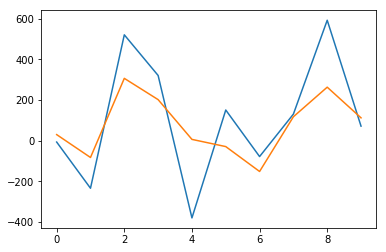

In [218]:
plt.plot(model.coef_)
plt.plot(model1.coef_)
plt.show()

In [4]:
model=LinearSVR()

NameError: name 'LinearSVR' is not defined